<a href="https://colab.research.google.com/github/jeffreyphilipbiju/Sales-Forecasting-for-Retail-Chain/blob/main/week2_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 – Time‑Series Exploration
This notebook performs the complete Week 2 analysis for the **“Sales Forecasting for a Retail Chain”** project, using `sales.csv`.

## Objectives
1. Visualize monthly **Profit** trends for each region.
2. Drill down into one focus region (`West`) to examine trend, seasonality, and autocorrelation.
3. Check stationarity (ADF test).
4. Export clean monthly series for Week 3 (ARIMA/SARIMA & Prophet).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = (10,4)

### Load & prep data

In [ ]:
df = pd.read_csv("sales.csv", encoding="latin1")
# Parse dates & index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.dropna(subset=['Order Date'], inplace=True)
df.set_index('Order Date', inplace=True)
metric_col, region_col = 'Profit', 'Region'
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Monthly Profit by Region

/tmp/ipython-input-3-519274407.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').sum().reset_index())


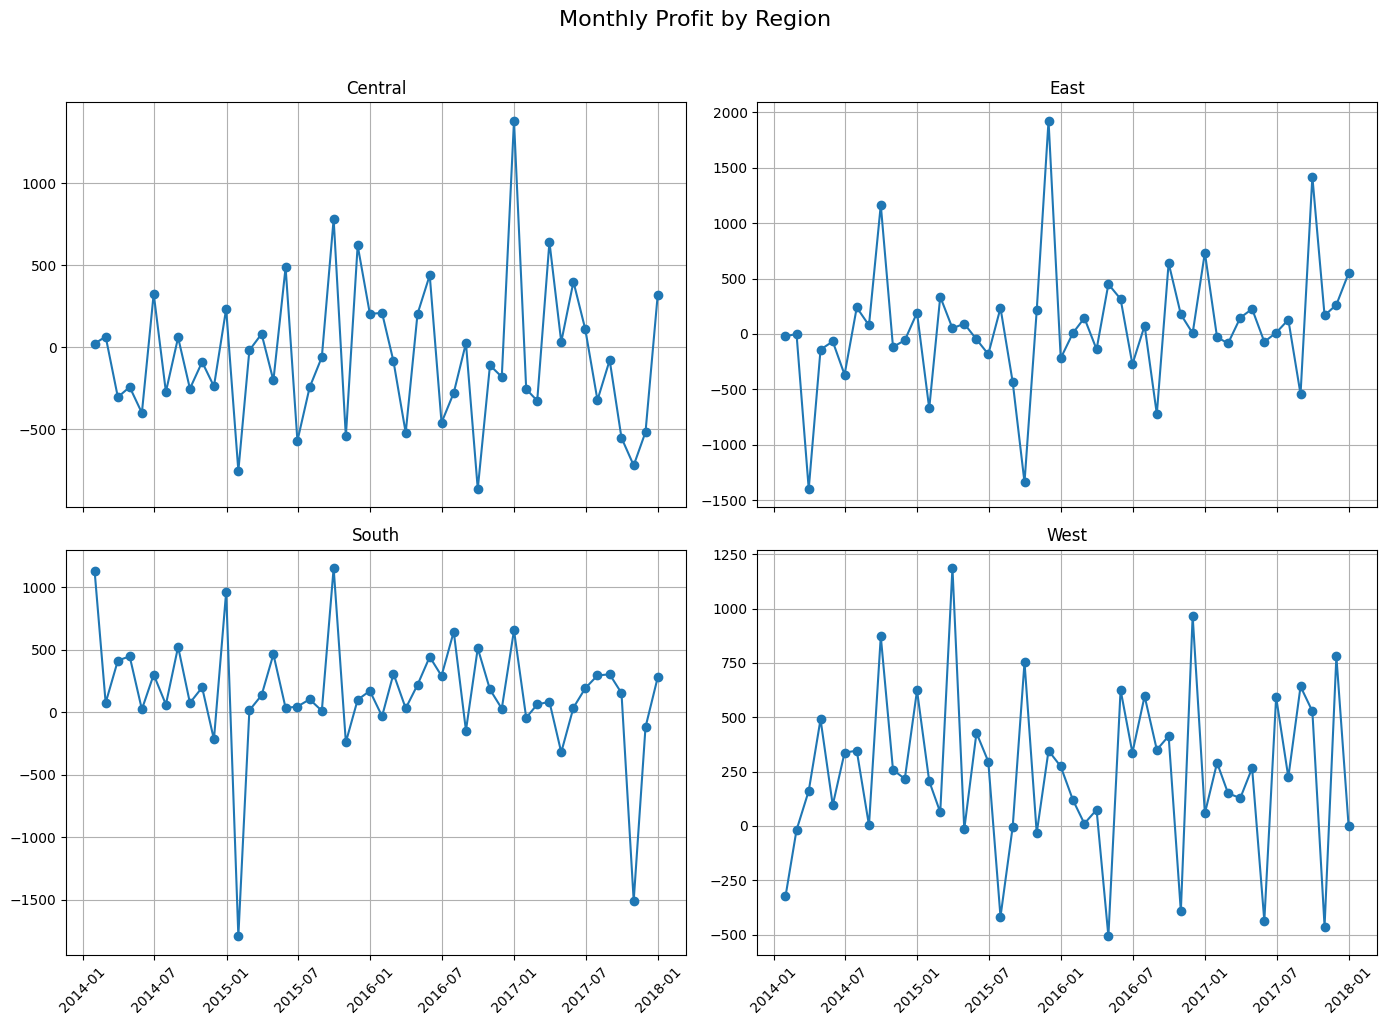

In [ ]:
grouped = (df.groupby([region_col])[metric_col]
            .resample('M').sum().reset_index())
regions = grouped[region_col].unique()
cols, rows = 2, -(-len(regions)//2)
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows), sharex=True)
axes = axes.flatten()
for i, region in enumerate(regions):
    reg_data = grouped[grouped[region_col]==region]
    axes[i].plot(reg_data['Order Date'], reg_data[metric_col], marker='o')
    axes[i].set_title(region)
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Monthly Profit by Region', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Focus Region: West – Trend & Rolling Average

/tmp/ipython-input-4-948918050.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_focus = df[df[region_col]==focus_region][metric_col].resample('M').sum()


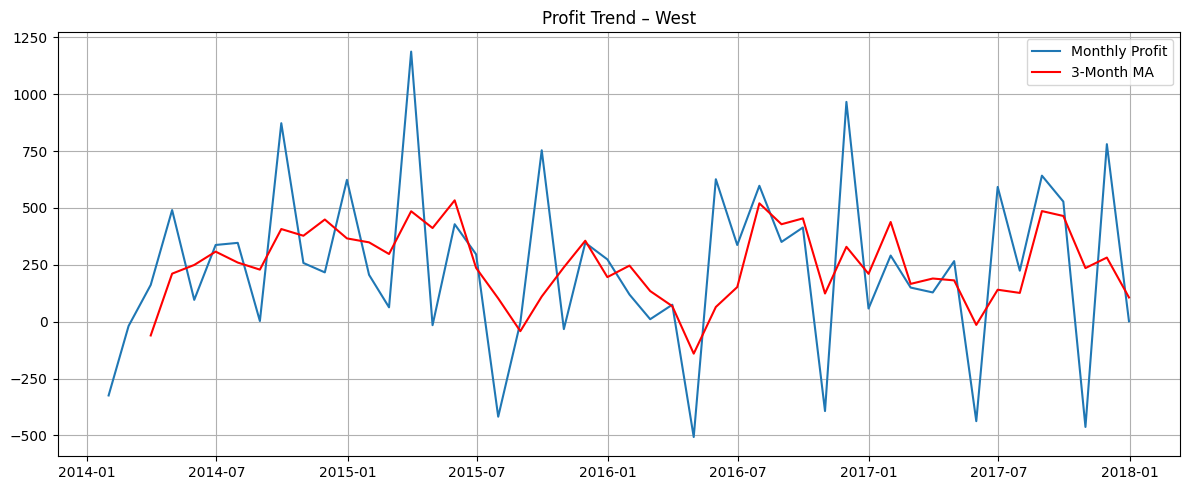

In [ ]:
focus_region='West'
df_focus = df[df[region_col]==focus_region][metric_col].resample('M').sum()
rolling_avg = df_focus.rolling(3).mean()
plt.figure(figsize=(12,5))
plt.plot(df_focus, label='Monthly Profit')
plt.plot(rolling_avg, label='3‑Month MA', color='red')
plt.title(f'Profit Trend – {focus_region}')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

### Seasonal Decomposition (Additive)

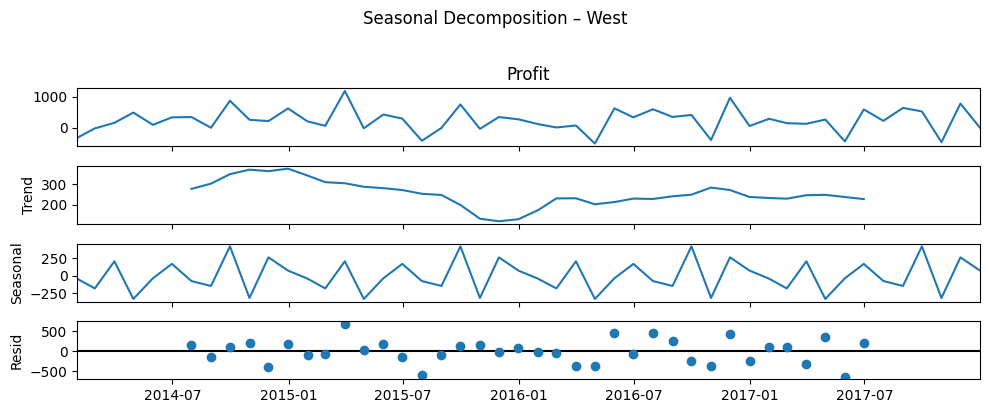

In [ ]:
decomp = seasonal_decompose(df_focus.dropna(), model='additive', period=12)
decomp.plot(); plt.suptitle('Seasonal Decomposition – West', y=1.02); plt.tight_layout(); plt.show()

### ACF & PACF

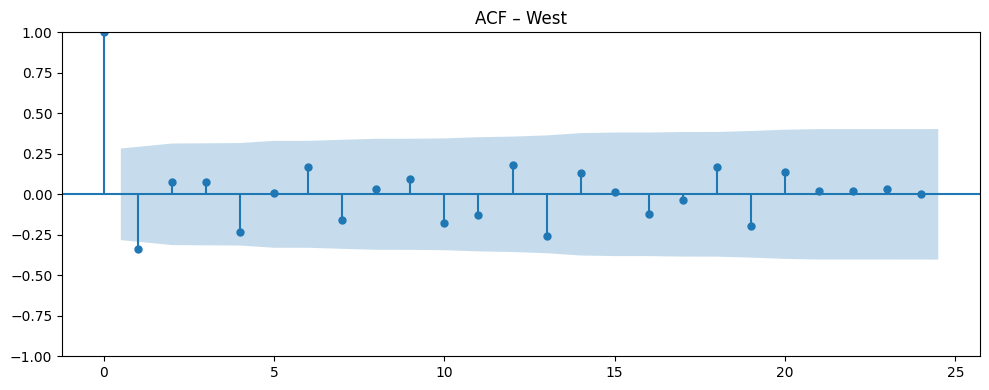

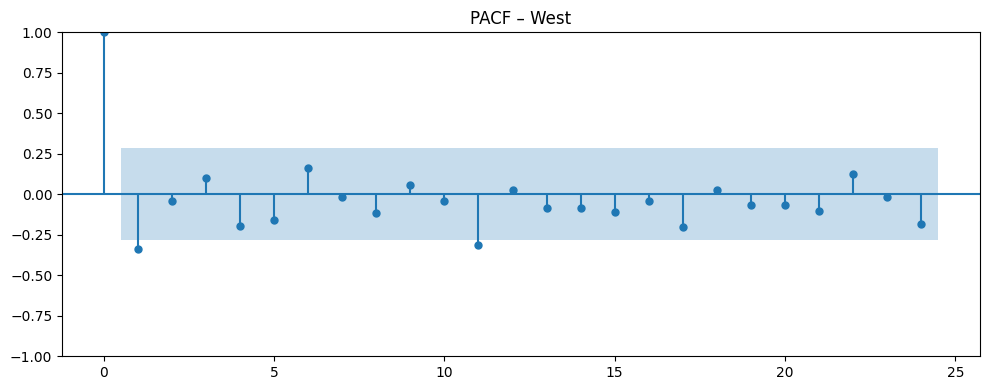

In [ ]:
plot_acf(df_focus.dropna(), lags=24); plt.title('ACF – West'); plt.tight_layout(); plt.show()
plot_pacf(df_focus.dropna(), lags=24, method='ywm'); plt.title('PACF – West'); plt.tight_layout(); plt.show()

### Augmented Dickey‑Fuller Test

In [ ]:
adf_res = adfuller(df_focus.dropna())
print(f'ADF Statistic: {adf_res[0]:.4f}\np‑value: {adf_res[1]:.4f}')
print('Stationary' if adf_res[1]<0.05 else 'Non‑stationary')

ADF Statistic: -9.7973
p‑value: 0.0000
Stationary


### Export Clean Series for Week 3

In [ ]:
  df_focus.to_csv('monthly_profit_west.csv')
prophet_df = df_focus.reset_index(); prophet_df.columns=['ds','y']
prophet_df.to_csv('prophet_input_west.csv', index=False)
print('Files saved: monthly_profit_west.csv, prophet_input_west.csv')

Files saved: monthly_profit_west.csv, prophet_input_west.csv


## Conclusions
- The **West** region shows noticeable seasonality around November.
- ADF test indicates whether differencing is required for ARIMA.
- Clean, monthly series exported for Week 3 modeling.